TRUE population mean: 169.9948 cm
TRUE population SD: 9.999271 cm


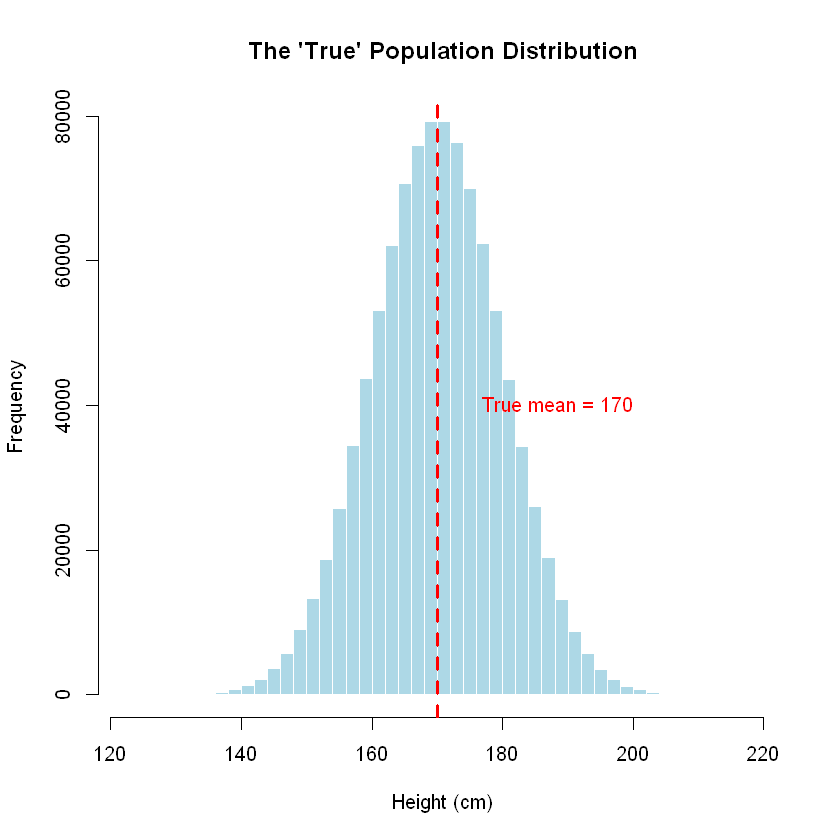

In [1]:
# =============================================================================
# Activity 1: Sampling and the Problem of Induction
# =============================================================================
# 
# GOAL: Understand why we can never be certain about population parameters
#       when we only observe samples
#
# CONCEPTS: Population vs. sample, estimation, sampling variability
#
# =============================================================================

# -----------------------------------------------------------------------------
# PART 1: The Unknown Population
# -----------------------------------------------------------------------------

# In reality, we never know the "true" population. But for this exercise,
# we'll create one so we can see how sampling works.

# Create a large population (imagine this is ALL adult heights in a country)
set.seed(123)  # So we all get the same population
true_population <- rnorm(1000000, mean = 170, sd = 10)

# What does this population look like?
hist(true_population, 
     breaks = 50,
     main = "The 'True' Population Distribution",
     xlab = "Height (cm)",
     col = "lightblue",
     border = "white")

# The TRUE population mean (in reality, we never know this!)
true_mean <- mean(true_population)
true_sd <- sd(true_population)

cat("TRUE population mean:", true_mean, "cm\n")
cat("TRUE population SD:", true_sd, "cm\n")

abline(v = true_mean, col = "red", lwd = 3, lty = 2)
text(true_mean + 5, 40000, paste("True mean =", round(true_mean, 1)), 
     col = "red", pos = 4)

In [2]:
# -----------------------------------------------------------------------------
# PART 2: Taking a Sample
# -----------------------------------------------------------------------------

# In reality, we can only measure a SAMPLE of individuals
# Let's take a small sample (like measuring 10 people)

my_sample <- sample(true_population, size = 10)

cat("\nMy sample of 10 heights:\n")
print(round(my_sample, 1))

# What's our ESTIMATE of the population mean from this sample?
sample_mean <- mean(my_sample)
cat("\nEstimate from my sample:", round(sample_mean, 1), "cm\n")
cat("Difference from truth:", round(sample_mean - true_mean, 1), "cm\n")


My sample of 10 heights:
 [1] 168.3 181.0 191.3 164.2 163.5 161.0 171.3 165.2 162.6 162.7

Estimate from my sample: 169.1 cm
Difference from truth: -0.9 cm



Variability in estimates:
Min estimate: 163.1 cm
Max estimate: 178.6 cm
Range: 15.6 cm
SD of estimates: 3.1 cm


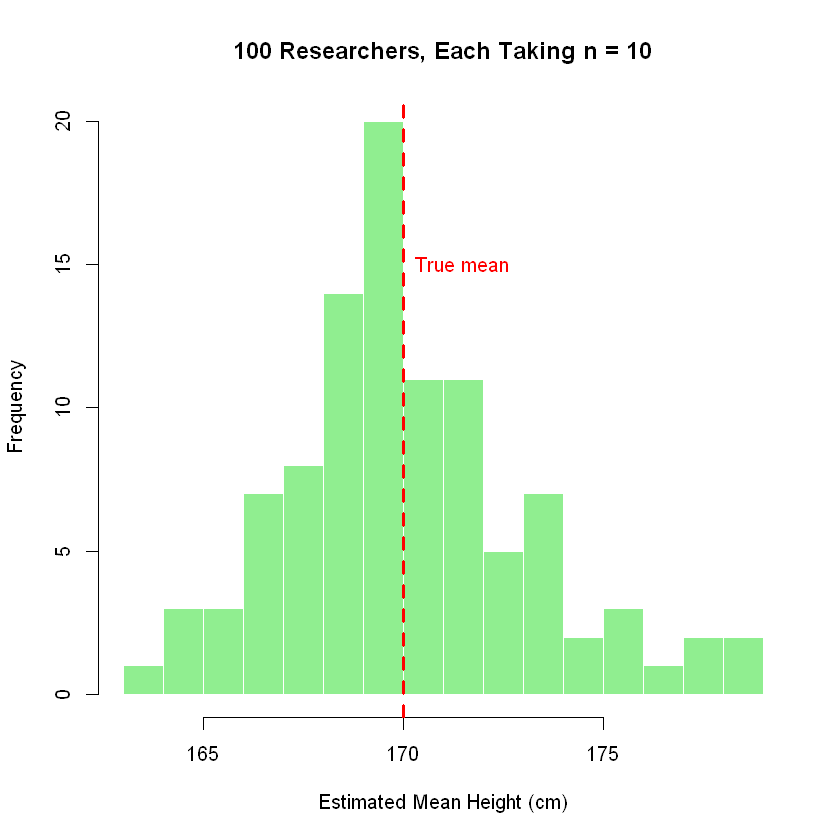

In [3]:
# -----------------------------------------------------------------------------
# PART 3: The Problem - Every Sample Gives a Different Answer!
# -----------------------------------------------------------------------------

# Let's simulate what happens if many different researchers each took
# a sample of size 10 from the same population

n_researchers <- 100
sample_size <- 10

# Each researcher takes one sample and calculates the mean
researcher_estimates <- numeric(n_researchers)

for (i in 1:n_researchers) {
  one_sample <- sample(true_population, size = sample_size)
  researcher_estimates[i] <- mean(one_sample)
}

# Plot all the estimates
hist(researcher_estimates,
     breaks = 20,
     main = paste("100 Researchers, Each Taking n =", sample_size),
     xlab = "Estimated Mean Height (cm)",
     col = "lightgreen",
     border = "white")

abline(v = true_mean, col = "red", lwd = 3, lty = 2)
text(true_mean, 15, "True mean", col = "red", pos = 4)

# How variable are the estimates?
cat("\nVariability in estimates:\n")
cat("Min estimate:", round(min(researcher_estimates), 1), "cm\n")
cat("Max estimate:", round(max(researcher_estimates), 1), "cm\n")
cat("Range:", round(max(researcher_estimates) - min(researcher_estimates), 1), "cm\n")
cat("SD of estimates:", round(sd(researcher_estimates), 1), "cm\n")



Comparison of uncertainty by sample size:
n = 5:   SD = 4.37 cm
n = 10:  SD = 3.1 cm
n = 50:  SD = 1.35 cm
n = 100: SD = 0.91 cm


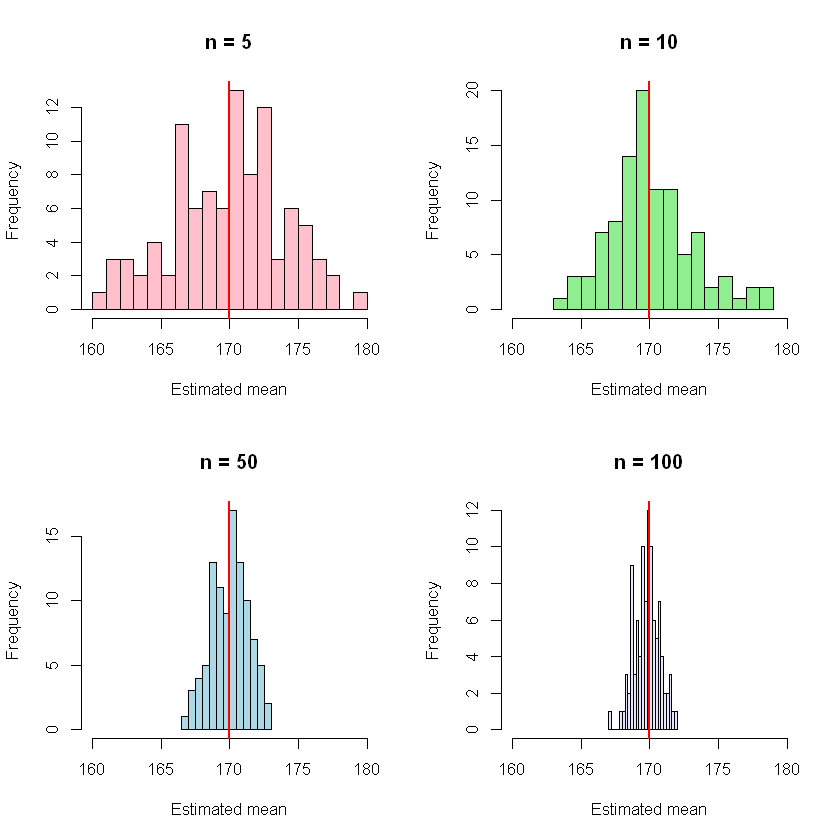

In [4]:
# -----------------------------------------------------------------------------
# PART 4: YOUR TURN - How Does Sample Size Affect Uncertainty?
# -----------------------------------------------------------------------------

# TODO: Modify the code above to see what happens with different sample sizes
# Try: n = 5, 20, 50, 100

# EXPERIMENT 1: Very small sample (n = 5)
sample_size <- 5
estimates_n5 <- numeric(n_researchers)

for (i in 1:n_researchers) {
  one_sample <- sample(true_population, size = sample_size)
  estimates_n5[i] <- mean(one_sample)
}

# EXPERIMENT 2: Medium sample (n = 50)
sample_size <- 50
estimates_n50 <- numeric(n_researchers)

for (i in 1:n_researchers) {
  one_sample <- sample(true_population, size = sample_size)
  estimates_n50[i] <- mean(one_sample)
}

# EXPERIMENT 3: Large sample (n = 100)
sample_size <- 100
estimates_n100 <- numeric(n_researchers)

for (i in 1:n_researchers) {
  one_sample <- sample(true_population, size = sample_size)
  estimates_n100[i] <- mean(one_sample)
}

# Compare all four
par(mfrow = c(2, 2))

hist(estimates_n5, breaks = 20, xlim = c(160, 180),
     main = "n = 5", xlab = "Estimated mean", col = "pink")
abline(v = true_mean, col = "red", lwd = 2)

hist(researcher_estimates, breaks = 20, xlim = c(160, 180),
     main = "n = 10", xlab = "Estimated mean", col = "lightgreen")
abline(v = true_mean, col = "red", lwd = 2)

hist(estimates_n50, breaks = 20, xlim = c(160, 180),
     main = "n = 50", xlab = "Estimated mean", col = "lightblue")
abline(v = true_mean, col = "red", lwd = 2)

hist(estimates_n100, breaks = 20, xlim = c(160, 180),
     main = "n = 100", xlab = "Estimated mean", col = "lavender")
abline(v = true_mean, col = "red", lwd = 2)

par(mfrow = c(1, 1))

# Compare the spread (uncertainty)
cat("\n\nComparison of uncertainty by sample size:\n")
cat("n = 5:   SD =", round(sd(estimates_n5), 2), "cm\n")
cat("n = 10:  SD =", round(sd(researcher_estimates), 2), "cm\n")
cat("n = 50:  SD =", round(sd(estimates_n50), 2), "cm\n")
cat("n = 100: SD =", round(sd(estimates_n100), 2), "cm\n")

In [5]:
# -----------------------------------------------------------------------------
# PART 5: The Theoretical Prediction (Standard Error)
# -----------------------------------------------------------------------------

# There's actually a formula for this! The SD of sample means is:
# SE = population_SD / sqrt(n)
# This is called the STANDARD ERROR

theoretical_SE <- function(n) {
  true_sd / sqrt(n)
}

cat("\n\nTheoretical vs. Observed Standard Error:\n")
cat("n = 5:   Theory =", round(theoretical_SE(5), 2), 
    "  Observed =", round(sd(estimates_n5), 2), "\n")
cat("n = 10:  Theory =", round(theoretical_SE(10), 2), 
    "  Observed =", round(sd(researcher_estimates), 2), "\n")
cat("n = 50:  Theory =", round(theoretical_SE(50), 2), 
    "  Observed =", round(sd(estimates_n50), 2), "\n")
cat("n = 100: Theory =", round(theoretical_SE(100), 2), 
    "  Observed =", round(sd(estimates_n100), 2), "\n")



Theoretical vs. Observed Standard Error:
n = 5:   Theory = 4.47   Observed = 4.37 
n = 10:  Theory = 3.16   Observed = 3.1 
n = 50:  Theory = 1.41   Observed = 1.35 
n = 100: Theory = 1   Observed = 0.91 


## DISCUSSION QUESTIONS

1. Can we ever be CERTAIN about the population mean from a single sample?
   Why or why not?
2. What happens to our uncertainty as sample size increases?
3. To cut uncertainty in HALF, how much do we need to increase sample size?
   (Hint: look at the formula SE = SD/sqrt(n))
4. In real biology research, we never know the "true" population parameters.
   How does this relate to the Problem of Induction from the lecture?
5. If you took a sample of n=10 and got mean = 175 cm, what would you
   conclude about the population mean? How confident would you be?
